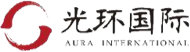

### 需求
- 加载数据
- 查看数据的基本信息
- 指定数据截取，将如下字段的数据进行提取，其他数据舍弃
    - cand_nm ：候选人姓名
    - contbr_nm ： 捐赠人姓名
    - contbr_st ：捐赠人所在州
    - contbr_employer ： 捐赠人所在公司
    - contbr_occupation ： 捐赠人职业
    - contb_receipt_amt ：捐赠数额（美元）
    - contb_receipt_dt ： 捐款的日期
- 对新数据进行总览,查看是否存在缺失数据
- 用统计学指标快速描述数值型属性的概要。
- 空值处理。可能因为忘记填写或者保密等等原因，相关字段出现了空值，将其填充为NOT PROVIDE
- 异常值处理。将捐款金额<=0的数据删除
- 新建一列为各个候选人所在党派party
- 查看party这一列中有哪些不同的元素
- 统计party列中各个元素出现次数
- 查看各个党派收到的政治献金总数contb_receipt_amt
- 查看具体每天各个党派收到的政治献金总数contb_receipt_amt
- 将表中日期格式转换为'yyyy-mm-dd'。
- 查看老兵(捐献者职业)DISABLED VETERAN主要支持谁


In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

In [4]:
df = pd.read_csv('./data/usa_election.txt')
df.head()

/var/folders/c3/v151c5vx0vs76fdnrcpw08sr0000gn/T/ipykernel_73593/2915766267.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/usa_election.txt')


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [5]:
df = df[['cand_nm','contbr_nm','contbr_st','contbr_employer','contbr_occupation','contb_receipt_amt','contb_receipt_dt']]
df.head(5)

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [6]:
#对新数据进行总览,查看是否存在缺失数据
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536041 entries, 0 to 536040
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cand_nm            536041 non-null  object 
 1   contbr_nm          536041 non-null  object 
 2   contbr_st          536040 non-null  object 
 3   contbr_employer    525088 non-null  object 
 4   contbr_occupation  530520 non-null  object 
 5   contb_receipt_amt  536041 non-null  float64
 6   contb_receipt_dt   536041 non-null  object 
dtypes: float64(1), object(6)
memory usage: 28.6+ MB


In [8]:
#用统计学指标快速描述数值型属性的概要。
df.describe()

,contb_receipt_amt
count,5.360410e+05
mean,3.750373e+02
std,3.564436e+03
min,-3.080000e+04
25%,5.000000e+01
50%,1.000000e+02
75%,2.500000e+02
max,1.944042e+06


In [9]:
#空值处理。可能因为忘记填写或者保密等等原因，相关字段出现了空值，将其填充为NOT PROVIDE
df.fillna(value='NOT PROVIDE',inplace=True)

In [15]:
#异常值处理。将捐款金额<=0的数据删除
drop_indexs = df.loc[df['contb_receipt_amt'] < 0].index
df.drop(index=drop_indexs,inplace=True)

In [17]:
#新建一列为各个候选人所在党派party
df['cand_nm'].unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [20]:
#可以通过百度搜索，找到每一个候选人对应的党派
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 } 
df['party'] = df['cand_nm'].map(parties)

In [21]:
#查看party这一列中有哪些不同的元素
df['party'].unique()

array(['Republican', 'Democrat', 'Reform', 'Libertarian'], dtype=object)

In [23]:
#统计party列中各个元素出现次数
df['party'].value_counts()

Democrat       290003
Republican     234300
Reform           5313
Libertarian       702
Name: party, dtype: int64

In [25]:
#查看各个党派收到的政治献金总数contb_receipt_amt
df.groupby(by='party')['contb_receipt_amt'].sum()

party
Democrat       8.259441e+07
Libertarian    4.132769e+05
Reform         3.429658e+05
Republican     1.251181e+08
Name: contb_receipt_amt, dtype: float64

In [27]:
#查看具体每天各个党派收到的政治献金总数contb_receipt_amt
df.groupby(by=['contb_receipt_dt','party'])['contb_receipt_amt'].sum()

contb_receipt_dt  party      
01-APR-11         Reform             50.00
                  Republican      12635.00
01-AUG-11         Democrat       182198.00
                  Libertarian      1000.00
                  Reform           1847.00
                                   ...    
31-MAY-11         Republican     313839.80
31-OCT-11         Democrat       216971.87
                  Libertarian      4250.00
                  Reform           3205.00
                  Republican     751542.36
Name: contb_receipt_amt, Length: 1183, dtype: float64

In [30]:
#将表中日期格式转换为'yyyy-mm-dd'。
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
def transfrom_dt(d):
    day,month,year = d.split('-')
    month = months[month]
    return '20'+year + '-' + str(month) + '-' + day
df['contb_receipt_dt'] = df['contb_receipt_dt'].map(transfrom_dt)

In [31]:
df.head(5)

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,2011-6-20,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,2011-6-23,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,2011-7-05,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,2011-8-01,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,2011-6-20,Republican


In [34]:
#查看老兵(捐献者职业)DISABLED VETERAN主要支持谁
old_df = df.loc[df['contbr_occupation'] == 'DISABLED VETERAN'] #老兵对应的行数据

In [35]:
old_df.groupby(by='cand_nm')['contb_receipt_amt'].sum()

cand_nm
Cain, Herman       300.00
Obama, Barack     4205.00
Paul, Ron         2425.49
Santorum, Rick     250.00
Name: contb_receipt_amt, dtype: float64